# Phase portraits

Lets study the phase portraits of dynamical systems by considering different intraction matrix $A$. 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use(['science', 'notebook', 'grid'])

## Stable Fixed point

$\textbf{both eigen values negative}$

Given, 
$$
A = \begin{bmatrix} 0 & 1\\ -2 & -3 \end{bmatrix}
$$


In [5]:
#define the time base
dt = 0.01 #time step
T = 10  #amount of time to integrate
n = int(T/dt)
t = np.linspace(0,T,n) # t = np.linspace(0,10,1000)

#define intitial value
X0 = [2, -3]

#analytic solution equation
x = np.exp(-t) + np.exp(-2*t) # check the power of exponents are eigen values of matrix A

#define the matrix
A = np.array([[0,1], [-2, -3]])

# defining a dummy function A dot product y as
def linear_ode(t,X): # this function represent the right hand side of vector field
    return A @ X


#the built in fucntion takes the function handle, time span, initial value, and whihc time to evaluated on
linear_ode_solution = solve_ivp(linear_ode, (0,10), X0, t_eval=t)
X = linear_ode_solution.y

#eighen values of A should be the roots of characterisitics equations!
eigvals, eigvecs = np.linalg.eig(A)
print(eigvals)


[-1. -2.]


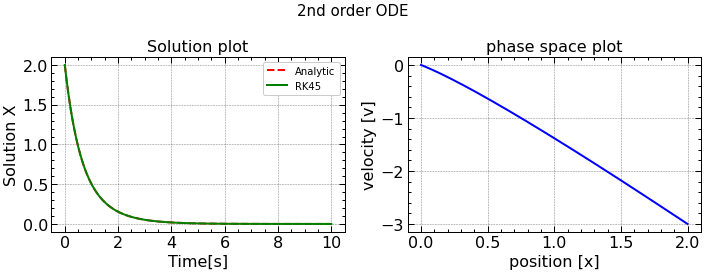

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10,3.5))

ax = axes[0]
ax.plot(t,x,'r--')
ax.plot(t, X[0, :], 'g')
ax.set_xlabel("Time[s]")
ax.set_ylabel('Solution X')
ax.set_title('Solution plot')
ax.legend(['Analytic', 'RK45'], fontsize=10)


ax = axes[1]
ax.plot(X[0, :], X[1, :], 'b')
ax.set_xlabel('position [x]')
ax.set_ylabel('velocity [v]')
ax.set_title('phase space plot')
#ax.legend()

fig.tight_layout()
fig.suptitle('2nd order ODE', y=1.1, fontsize=15)
plt.show()

* The solution decays down to zero as time passes.

## Stable Spiral 

$\textbf{-a +/- ib}$

The phase potrait is a stable spiral. This means the eigen value ($\lambda$) of matrix A has negative real part and non-zero imaginary part.

Let us suppose,
$$
\begin{bmatrix} 0 & 1\\ -\omega^{2} & -\zeta \end{bmatrix} 
$$


In [17]:
# Defining constants 
w = 2 * np.pi #natural frequency
d = 0.25 #damping ratio, where zeta = - 2*d*w

#defining the matrix for spring mass damper system
A = np.array([[0,1], [-w**2, -2*d*w]]) # dot{x} = Ax

dt = 0.01 #time step
T = 10  #amount of time to integrate
n = int(T/dt)
t = np.linspace(0,T,n)

X0 = [2, 0] # initial conditions (arbitary)

#4th order Runge Kutta

def linear_old(t,X): # t is defult time, x is supposition for state vector
    return A @ X # A is matrix & x is state vector
# @ is symbol for matrix vector product

linear_ode_solution = solve_ivp(linear_ode, (0, T), X0, t_eval=t)
X_RK = linear_ode_solution.y

EV = np.linalg.eig(A)
print('eigen values = ')
EV[0]

eigen values = 


array([-1.57079633+6.08366801j, -1.57079633-6.08366801j])

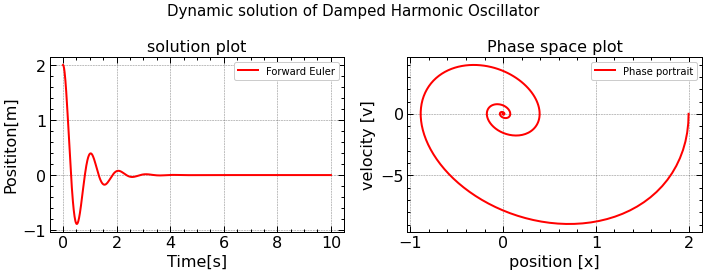

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10,3.5))

ax = axes[0]
ax.plot(t, X_RK[0, :], 'r')
ax.set_xlabel('Time[s]')
ax.set_ylabel('Posititon[m]')
ax.set_title('solution plot')
ax.legend(['Forward Euler', 'ODE RK'], fontsize=10)

ax = axes[1]
ax.plot(X_RK[0, :], X_RK[1, :], 'r')
ax.set_xlabel('position [x]')
ax.set_ylabel('velocity [v]')
ax.set_title('Phase space plot')
plt.legend(['Phase portrait'], fontsize=10)

fig.tight_layout()
fig.suptitle('Dynamic solution of Damped Harmonic Oscillator', y=1.1, fontsize=15)
plt.show()


* The solution oscillate down to zero as time passes. In phase space it looks like a inward spiral to the fixed point.

## Un-Stable Fixed Points:

$\textbf{Both positive eigen values}$ 

If provided interaction matrix $A$ is:
$$
 A = \begin{bmatrix} 3 & -1\\ -1 & 3 \end{bmatrix} 
$$

In [24]:
# Given
A = np.array([[3,-1], [-1,3]])


dt = 0.01 #time step
T = 5  #amount of time to integrate
n = int(T/dt)
t = np.linspace(0,T,n)

X0 = [2, 0] # initial conditions (arbitary)

def linear_ode(t,X): # t is defult time, X is supposition for state vector
    return A @ X # A is matrix & x is state vector
# @ is symbol for matrix vector product

linear_ode_solution = solve_ivp(linear_ode, (0, T), X0, t_eval=t)
X_RK = linear_ode_solution.y

EV = np.linalg.eig(A)
print('eigen values = ',EV[0] )
print('eigen vectors = ',EV[1] )

eigen values =  [4. 2.]
eigen vectors =  [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


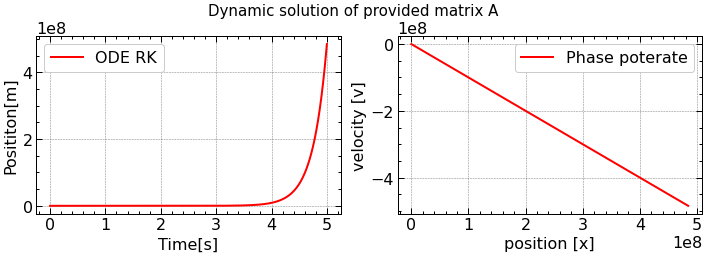

In [25]:

fig, axes = plt.subplots(1, 2, figsize=(10,3.5))

ax = axes[0]
ax.plot(t, X_RK[0, :], 'r')
ax.set_xlabel('Time[s]')
ax.set_ylabel('Posititon[m]')
ax.legend(['ODE RK'])

ax = axes[1]
ax.plot(X_RK[0, :], X_RK[1, :], 'r')
ax.set_xlabel('position [x]')
ax.set_ylabel('velocity [v]')
plt.legend(['Phase poterate'])

fig.tight_layout()
fig.suptitle('Dynamic solution of provided matrix A', y=1.03, fontsize=15)
plt.show()


##  Saddle Points:

$\textbf{One positive & one negative Eigen Values}$

Given, 
$$
A = \begin{bmatrix} 1 & 0\\ 0 & -1 \end{bmatrix}
$$

In [21]:
A = np.array([[1,0],[0,-1]]) # saddle point

dt = 0.01 #time step
T = 5  #amount of time to integrate
n = int(T/dt)
t = np.linspace(0,T,n)

x0 = [1, 5] # initial conditions (arbitary)

def linear_old(t,x): # t is defult time, x is supposition for state vector
    return A @ x # A is matrix & x is state vector
# @ is symbol for matrix vector product

linear_ode_solution = solve_ivp(linear_ode, (0, T), x0, t_eval=t)
x_RK = linear_ode_solution.y

EV = np.linalg.eig(A)
print('eigen values = ')
EV[0]

eigen values = 


array([ 1., -1.])

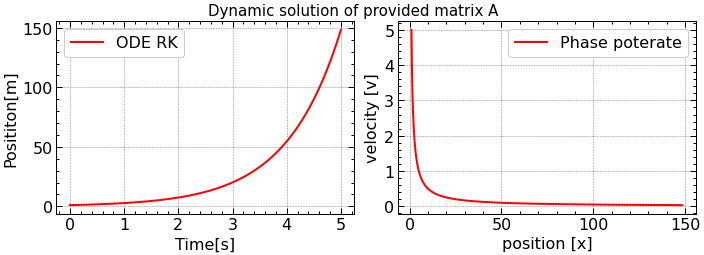

In [22]:

fig, axes = plt.subplots(1, 2, figsize=(10,3.5))

ax = axes[0]
ax.plot(t, x_RK[0, :], 'r')
ax.set_xlabel('Time[s]')
ax.set_ylabel('Posititon[m]')
ax.legend(['ODE RK'])

ax = axes[1]
ax.plot(x_RK[0, :], x_RK[1, :], 'r')
ax.set_xlabel('position [x]')
ax.set_ylabel('velocity [v]')
plt.legend(['Phase poterate'])

fig.tight_layout()
fig.suptitle('Dynamic solution of provided matrix A', y=1.03, fontsize=15)
plt.show()


## Central Fixed point: Stable (Marginally):

$\textbf{Complex Eigen Values}$

This could be  a particle in a well, a common physic problem.

Given, 
$$
A = \begin{bmatrix} 0 & 2\\ -2 & 0 \end{bmatrix}
$$

In [16]:


A = np.array([[0,2],[-2,0]]) # saddle point

dt = 0.01 #time step
T = 5  #amount of time to integrate
n = int(T/dt)
t = np.linspace(0,T,n)

x0 = [1, 5] # initial conditions (arbitary)

def linear_old(t,x): # t is defult time, x is supposition for state vector
    return A @ x # A is matrix & x is state vector
# @ is symbol for matrix vector product

linear_ode_solution = solve_ivp(linear_ode, (0, T), x0, t_eval=t)
x_RK = linear_ode_solution.y


EV = np.linalg.eig(A)
print('eigen values = ')
EV[0]

eigen values = 


array([0.+2.j, 0.-2.j])

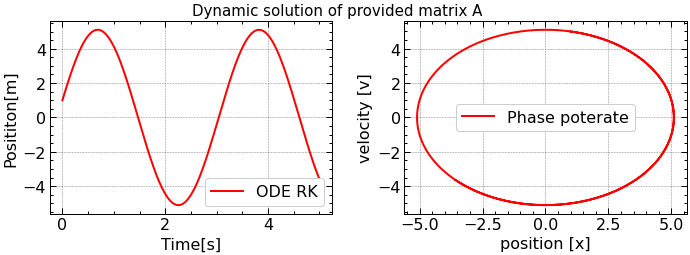

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10,3.5))

ax = axes[0]
ax.plot(t, x_RK[0, :], 'r')
ax.set_xlabel('Time[s]')
ax.set_ylabel('Posititon[m]')
ax.legend(['ODE RK'])

ax = axes[1]
ax.plot(x_RK[0, :], x_RK[1, :], 'r')
ax.set_xlabel('position [x]')
ax.set_ylabel('velocity [v]')
plt.legend(['Phase poterate'])

fig.tight_layout()
fig.suptitle('Dynamic solution of provided matrix A', y=1.03, fontsize=15)
plt.show()
